# EDA

In [1]:
import numpy as np
import pandas as pd

In [2]:
!pip install librosa #python lib used when dealing with sounds/music

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
filename='/Users/chandrakanth/Downloads/UrbanSound8K/siren.wav' #random audio file from the dataset

In [5]:
import IPython.display as ipd
import librosa
import librosa.display

In [6]:
filename

'/Users/chandrakanth/Downloads/UrbanSound8K/siren.wav'

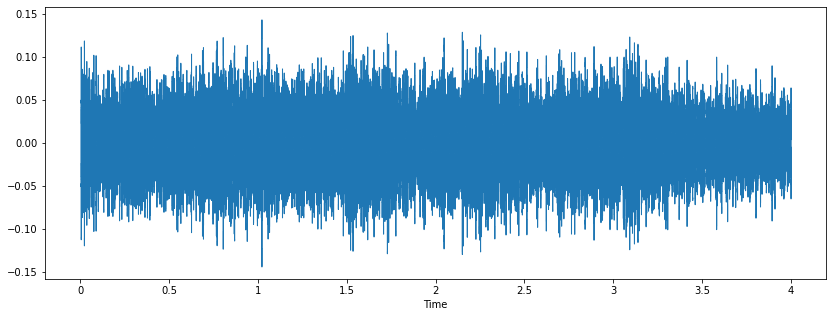

In [7]:
#random example of dog sound
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

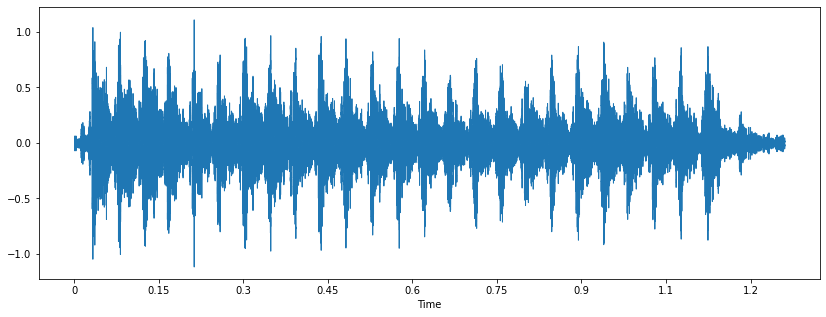

In [8]:
#example 2
filename1='/Users/chandrakanth/Downloads/UrbanSound8K/drill.wav'
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename1)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename1)

In [9]:
sample_rate

22050

In [10]:
data #these are  normalised sampled values of continue time signal 

array([-0.01867681, -0.0218842 , -0.02614726, ...,  0.01084091,
        0.01868928,  0.00362425], dtype=float32)

In [11]:
#librosa is a very commonly used library used for audio files, comapared to scipy or libraries for audio files

In [12]:
metadata=pd.read_csv(r"/Users/chandrakanth/Downloads/UrbanSound8K/metadata/UrbanSound8K.csv")
metadata


,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [13]:
#checking for imbalanced data
metadata['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

# Data Preprocessing

In [14]:
audio_file_path='/Users/chandrakanth/Downloads/UrbanSound8K/siren.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [15]:
print(librosa_audio_data)

[-0.01363303 -0.02161212 -0.02042931 ...  0.02854736  0.02522229
  0.02568438]


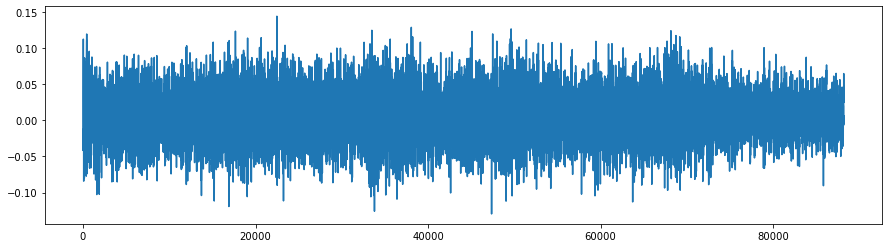

In [16]:
plt.figure(figsize=(15,4))
plt.plot(librosa_audio_data)


In [17]:
# Observation - While using librosa, it displays only 'mono', meaning it only shows one channel

In [18]:
#reading same file with scipy
from scipy.io import wavfile as wav
wav_sample_rate,wav_audio=wav.read(audio_file_path)

In [19]:
wav_audio  #here we are having 'stereo',meaning having two channels


array([[  840, -2106],
       [  794, -2060],
       [  736, -2030],
       ...,
       [  242,  1408],
       [  230,  1368],
       [  318,  1232]], dtype=int16)

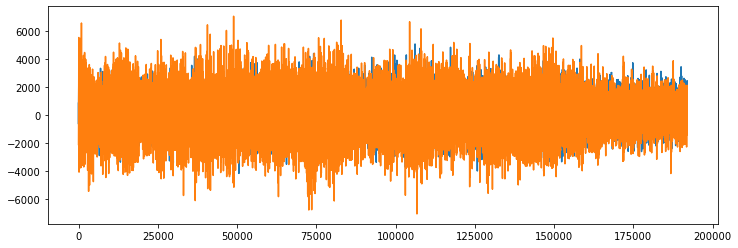

In [20]:
plt.figure(figsize=(12,4))  #stereo signals
plt.plot(wav_audio)

# Extract Features 

Mel-Frequency Cepstral Coefficients(MFCC): Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [21]:
#this will try to convert the audio into some kind of features based on the frequency and time period of audio signal 

In [22]:
mfccs=librosa.feature.mfcc(y=librosa_audio_data,sr=librosa_sample_rate,n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [23]:
mfccs  #data related to only sample audio file

array([[-2.9628934e+02, -2.6450070e+02, -2.6418250e+02, ...,
        -2.7410822e+02, -2.7639062e+02, -2.8564420e+02],
       [ 1.8941583e+02,  1.9427490e+02,  1.9676572e+02, ...,
         1.6957285e+02,  1.6185211e+02,  1.4732956e+02],
       [-7.4917583e+00, -2.0878170e+01, -2.7369972e+01, ...,
        -3.2958759e+01, -2.8951534e+01, -1.3418708e+01],
       ...,
       [ 6.3666475e-01, -6.6372234e-01,  1.0577810e+00, ...,
        -1.4730530e+00, -2.9428620e+00, -7.8981638e+00],
       [-5.4621339e+00, -3.1775632e+00,  4.9783587e-02, ...,
        -9.8547783e+00, -5.7544026e+00, -1.9677715e+00],
       [-1.0233697e+00,  4.0599275e-01,  2.4875894e+00, ...,
         4.0799338e-01,  1.7685319e+00,  2.5497727e+00]], dtype=float32)

In [24]:
metadata

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [25]:
audio_file_path

'/Users/chandrakanth/Downloads/UrbanSound8K/siren.wav'

In [26]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='/Users/chandrakanth/Downloads/UrbanSound8K/audio/'
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [27]:
def feature_extractor(file):
    audio,sample_rate=librosa.load(file_name,res_type='kaiser_fast')
    mfccs_features=librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
    mfccs_scaled_features=np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [28]:
#to execute the process for all audio files ,

import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=feature_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3554it [03:54, 10.76it/s]/Users/chandrakanth/opt/anaconda3/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
8324it [10:00, 18.70it/s]/Users/chandrakanth/opt/anaconda3/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
/Users/chandrakanth/opt/anaconda3/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
8732it [10:30, 13.85it/s]


In [29]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing


In [30]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [31]:
X.shape

(8732, 40)

In [32]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [33]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

2023-02-27 12:37:19.581396: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [34]:
y.shape

(8732, 10)

In [35]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [36]:
X_train.shape

(6985, 40)

In [37]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

# Model Creation 


In [38]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Activation
from tensorflow.keras.optimizers import Adam 
from sklearn import metrics

In [40]:
#no of classes 
num_labels=y.shape[1]

In [41]:
model=Sequential()
#first layer
model.add(Dense(100,input_shape=(40,)))#40 because of size of X_train
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax')) #softmax is used as it multi-class classification

2023-02-27 12:37:26.800762: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [43]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [47]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
203/219 [==========================>...] - ETA: 0s - loss: 0.9694 - accuracy: 0.6798
Epoch 1: val_loss improved from inf to 0.79378, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 2ms/step - loss: 0.9704 - accuracy: 0.6816 - val_loss: 0.7938 - val_accuracy: 0.7665
Epoch 2/100
206/219 [===========================>..] - ETA: 0s - loss: 0.9683 - accuracy: 0.6833
Epoch 2: val_loss did not improve from 0.79378
219/219 [==============================] - 0s 2ms/step - loss: 0.9732 - accuracy: 0.6807 - val_loss: 0.8035 - val_accuracy: 0.7527
Epoch 3/100
198/219 [==========================>...] - ETA: 0s - loss: 0.9777 - accuracy: 0.6733
Epoch 3: val_loss improved from 0.79378 to 0.77145, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 2ms/step - loss: 0.9776 - accuracy: 0.6730 - val_loss: 0.7715 - val_accuracy: 0.7722
Epoch 4/100
207/219 [===========================>..] - ETA:

In [48]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7830566763877869


Testing Some Test Audio Data

Steps

1.Preprocess the new audio data
2.predict the classes
3.Invere transform your Predicted Label

In [49]:

filename='/Users/chandrakanth/Downloads/UrbanSound8K/siren.wav'
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict(mfccs_scaled_features)
predicted_x=np.argmax(predicted_label,axis=1)
print(predicted_x)
prediction_class = labelencoder.inverse_transform(predicted_x) 
prediction_class


#The model predicted output with great accuracy 

[-2.6279132e+02  1.8883434e+02 -3.6429142e+01  1.9822168e+01
 -1.6408653e+01  2.0868317e+01 -1.7798164e-01  1.0065309e+01
 -2.0543264e+01  1.3638077e+00 -5.2034254e+00  1.1123083e+01
 -8.1882076e+00 -4.2488990e+00 -1.1252136e+01  5.3423657e+00
 -4.0042648e+00 -4.0161389e-01 -9.5229940e+00 -3.8750837e+00
 -4.0806065e+00  1.5534227e+00  1.3142221e+00  1.4166762e+00
  9.5417601e-01  4.4674377e+00  5.6773973e+00  1.6041461e+00
 -2.5704377e+00  2.4616660e-01 -1.1948348e+00 -2.0621164e+00
 -2.3831036e+00 -4.7857342e+00 -1.9822867e+00 -2.1911993e+00
 -3.6069357e-01 -1.9626470e+00 -2.2576945e+00 -4.4977055e+00]
[[-2.6279132e+02  1.8883434e+02 -3.6429142e+01  1.9822168e+01
  -1.6408653e+01  2.0868317e+01 -1.7798164e-01  1.0065309e+01
  -2.0543264e+01  1.3638077e+00 -5.2034254e+00  1.1123083e+01
  -8.1882076e+00 -4.2488990e+00 -1.1252136e+01  5.3423657e+00
  -4.0042648e+00 -4.0161389e-01 -9.5229940e+00 -3.8750837e+00
  -4.0806065e+00  1.5534227e+00  1.3142221e+00  1.4166762e+00
   9.5417601e-01 

array(['siren'], dtype='<U16')